# Introduction
Project available at https://github.com/zalandoresearch/fashion-mnist

In [5]:
import tensorflow as tf
from keras.utils import to_categorical

In [7]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

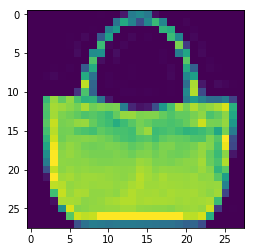

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(train_images[100])
plt.show()

In [9]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_images_scaled = train_images /255
test_images_scaled = test_images /255

In [11]:
model = tf.keras.models.Sequential ()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer=tf.train.AdamOptimizer(), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [16]:
class my_callback (tf.keras.callbacks.Callback) :
    def on_epoch_end (self, epoch, logs={}):
        if (logs.get('loss')<0.20):
            print ('Loss reduced substantially, stopping training')
            self.model.stop_training=True
            
callback = my_callback()
model.fit (train_images_scaled, train_labels, epochs=15, callbacks=[callback])
model.evaluate(test_images_scaled, test_labels)

Epoch 1/15
60000/60000 [==============================] - 2s 39us/sample - loss: 0.2259 - acc: 0.9154
Epoch 2/15
60000/60000 [==============================] - 2s 39us/sample - loss: 0.2176 - acc: 0.9174
Epoch 3/15
60000/60000 [==============================] - 2s 39us/sample - loss: 0.2138 - acc: 0.9201
Epoch 4/15
60000/60000 [==============================] - 2s 39us/sample - loss: 0.2058 - acc: 0.9230
Epoch 5/15
60000/60000 [==============================] - 2s 40us/sample - loss: 0.2005 - acc: 0.9242
Epoch 6/15
10000/10000 [==============================] - 0s 18us/sample - loss: 0.3388 - acc: 0.8885


[0.33877020614147185, 0.8885]

In [13]:
print (model.predict(test_images[10].reshape(1, 28,28)))
print (test_labels[10])

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
